# Correlation Analysis

## Setup

In [2]:
# import library
from scipy.io import loadmat
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from warpped.collection import parse_chronnectome, get_mean_chronnectome, get_number_of_visit
# import gloabl variables
from warpped.global_variables import * 
from warpped.figures import fig_set, update_matplotlib_fontsize

In [3]:
sns.set_style("white")
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_row',300)
update_matplotlib_fontsize()

## Load HMM Result

In [4]:
# The selected model should be contained in global_variables, if wanna try different parameter then uncomment bleow 
# K_state=10; rep_num = 2

hmm_file = base+f'chronotype_k{K_state}_rep_{rep_num}.mat'
hmminfo_file = base+f'hmminfo/hmminfo_k{K_state}_rep_{rep_num}.mat'
hmminfo_file

'/home/jzni/dissertation/analysis/output/hmminfo/hmminfo_k7_rep_3.mat'

In [68]:
def save_svg(sub_path):
    plt.savefig(f'../figures/k{K_state}_r{rep_num}/{sub_path}.svg',dpi=300,format='svg', transparent=True)

In [5]:
hmm = loadmat(hmm_file)
hmm_info = loadmat(hmminfo_file)

In [6]:
# Parse HMM info
state_order = np.squeeze(hmm_info['ord']) # the order of state for fo_corr and ordered_p
fo_corr = pd.DataFrame(hmm_info['fo_matrix'], columns=state_order, index=state_order)
ordered_p = pd.DataFrame(hmm_info['ordered_p'], columns=state_order, index=state_order)

## hmms = hmm_info['hmms']  # contains the subject specific hmm
# Parse chronnectome info
## info based on veterbi path 
raw_fo, lifetime, intervals = parse_chronnectome(hmm_info[hmminfo_source], model_selection=False)


## Load Behaviour Data

In [7]:
performance = pd.read_csv(f'{behav_dir}performance_proc.csv')
physio = pd.read_csv(f'{behav_dir}physio_proc.csv')
acti = pd.read_csv(f'{behav_dir}actigraph_proc.csv')
scales = pd.read_csv(f'{behav_dir}questionnaire_proc.csv')


In [8]:
fo_df =  pd.DataFrame(raw_fo, columns=[f'state{i}_fo' for i in range(1, K_state+1)])
lifetime_df = pd.DataFrame(get_mean_chronnectome(lifetime ), columns=[f'state{i}_life' for i in range(1, K_state+1)])
interval_df = pd.DataFrame(get_mean_chronnectome(intervals), columns=[f'state{i}_intervals' for i in range(1, K_state+1)])
visits_df = get_number_of_visit(lifetime)
visits_df.head()

,state1_visits,state2_visits,state3_visits,state4_visits,state5_visits,state6_visits,state7_visits
0,10,11,10,15,17,7,15
1,12,14,11,14,11,12,11
2,24,17,16,7,7,7,13
3,18,14,11,10,10,6,11
4,18,5,13,15,11,8,13


In [9]:
chronnectome_df = pd.concat([fo_df,lifetime_df, interval_df, visits_df], axis=1).applymap(lambda x: round(float(x),2))
chronnectome_df.head(3)

,state1_fo,state2_fo,state3_fo,state4_fo,state5_fo,state6_fo,state7_fo,state1_life,state2_life,state3_life,state4_life,state5_life,state6_life,state7_life,state1_intervals,state2_intervals,state3_intervals,state4_intervals,state5_intervals,state6_intervals,state7_intervals,state1_visits,state2_visits,state3_visits,state4_visits,state5_visits,state6_visits,state7_visits
0,0.12,0.11,0.12,0.22,0.17,0.08,0.19,5.20,4.36,5.30,6.60,4.53,4.86,5.80,43.11,38.60,42.56,19.57,19.12,28.33,24.64,10.0,11.0,10.0,15.0,17.0,7.0,15.0
1,0.15,0.15,0.12,0.18,0.13,0.15,0.13,5.50,4.93,4.82,5.71,5.18,5.67,5.18,34.64,25.85,36.70,25.92,35.30,29.55,38.70,12.0,14.0,11.0,14.0,11.0,12.0,11.0
2,0.27,0.21,0.21,0.06,0.06,0.06,0.13,5.12,5.47,5.88,4.00,3.86,4.00,4.38,13.78,19.81,23.33,38.00,53.33,57.67,29.17,24.0,17.0,16.0,7.0,7.0,7.0,13.0


<AxesSubplot:>

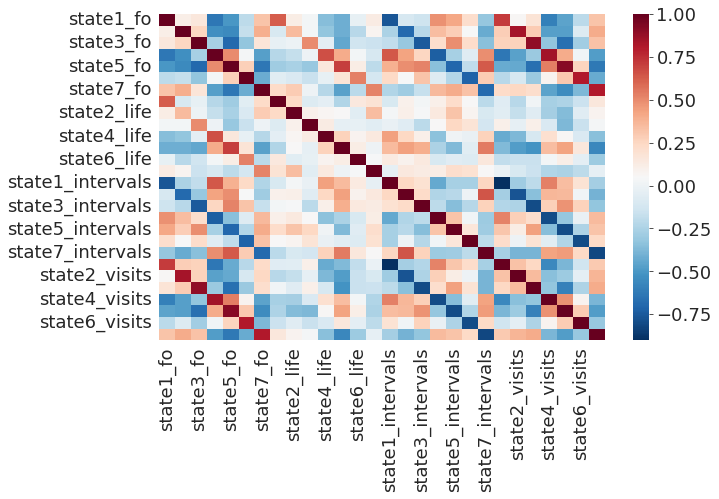

In [10]:
# FO matrix
plt.figure(figsize=(10,6))
sns.heatmap(chronnectome_df.corr(),cmap='RdBu_r')

## Label Encoding


In [11]:
# Chronotype Encoding
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(performance[['Type']])
chrono_array = oe_results.toarray()[:,0]
chrono_array

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
# Session Encoding 
ses_array = np.repeat([0,1,2],37)
ses_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

# Correlation

In [13]:
fo = fo_df.copy()
fo['chrono']=chrono_array; fo['time']=ses_array


In [14]:
fo.head()

,state1_fo,state2_fo,state3_fo,state4_fo,state5_fo,state6_fo,state7_fo,chrono,time
0,0.115556,0.106667,0.117778,0.220000,0.171111,0.075556,0.193333,1.0,0
1,0.146667,0.153333,0.117778,0.177778,0.126667,0.151111,0.126667,1.0,0
2,0.273333,0.206667,0.208889,0.062222,0.060000,0.062222,0.126667,1.0,0
3,0.160000,0.166667,0.140000,0.111111,0.182222,0.080000,0.160000,1.0,0
4,0.191111,0.046667,0.208889,0.206667,0.133333,0.102222,0.111111,1.0,0


In [15]:
# fo['Type'] = oe_results.toarray()[:,0] # E type as 1, L as 0
fo_m = fo[fo['time']==0] ;fo_a = fo[fo['time']==1].reset_index(drop=True) 
fo_e = fo[fo['time']==2].reset_index(drop=True)
fo.head()

,state1_fo,state2_fo,state3_fo,state4_fo,state5_fo,state6_fo,state7_fo,chrono,time
0,0.115556,0.106667,0.117778,0.220000,0.171111,0.075556,0.193333,1.0,0
1,0.146667,0.153333,0.117778,0.177778,0.126667,0.151111,0.126667,1.0,0
2,0.273333,0.206667,0.208889,0.062222,0.060000,0.062222,0.126667,1.0,0
3,0.160000,0.166667,0.140000,0.111111,0.182222,0.080000,0.160000,1.0,0
4,0.191111,0.046667,0.208889,0.206667,0.133333,0.102222,0.111111,1.0,0


## Task Performance 

In [16]:
from warpped.stat import partial_corr

<AxesSubplot:>

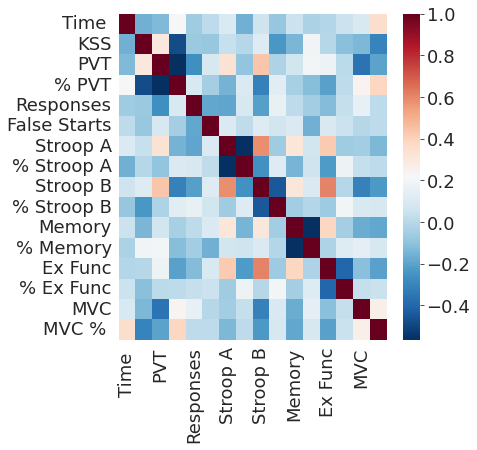

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap(performance.iloc[:,2:].corr(), cmap="RdBu_r", robust=True)

In [18]:
per_a = performance[performance['TOD']=='A'].iloc[:,2:] ; per_m = performance[performance['TOD']=='M'].iloc[:,2:]
per_e = performance[performance['TOD']=='E'].iloc[:,2:] 
per_mae = pd.concat([per_m, per_a, per_e], axis=0).reset_index(drop=True)
per_mae.head()

,TOD,Time,KSS,PVT,% PVT,Responses,False Starts,Stroop A,% Stroop A,Stroop B,% Stroop B,Memory,% Memory,Ex Func,% Ex Func,MVC,MVC %
0,M,8.42,3.0,0.37,94.72,32.0,4.0,0.91,100.0,0.94,100.00,4.57,80.15,81.36,100.00,51.5,89.57
1,M,8.77,3.0,0.35,95.37,33.0,1.0,0.83,100.0,1.11,97.25,5.87,66.28,86.77,100.00,40.2,84.63
2,M,8.89,2.0,0.42,82.93,27.0,6.0,0.94,100.0,1.08,100.00,5.07,78.41,88.67,100.00,40.8,100.00
3,M,8.58,3.0,0.35,95.97,32.0,0.0,0.84,94.5,0.95,100.00,4.87,100.00,84.35,95.09,38.7,100.00
4,M,8.64,4.0,0.40,99.78,34.0,0.0,1.10,100.0,1.33,100.00,5.63,88.27,91.61,97.49,40.8,97.84


In [19]:
df_fo_perform = pd.concat([fo, per_mae], axis=1)
df_fo_perform.head()

,state1_fo,state2_fo,state3_fo,state4_fo,state5_fo,state6_fo,state7_fo,chrono,time,TOD,Time,KSS,PVT,% PVT,Responses,False Starts,Stroop A,% Stroop A,Stroop B,% Stroop B,Memory,% Memory,Ex Func,% Ex Func,MVC,MVC %
0,0.115556,0.106667,0.117778,0.220000,0.171111,0.075556,0.193333,1.0,0,M,8.42,3.0,0.37,94.72,32.0,4.0,0.91,100.0,0.94,100.00,4.57,80.15,81.36,100.00,51.5,89.57
1,0.146667,0.153333,0.117778,0.177778,0.126667,0.151111,0.126667,1.0,0,M,8.77,3.0,0.35,95.37,33.0,1.0,0.83,100.0,1.11,97.25,5.87,66.28,86.77,100.00,40.2,84.63
2,0.273333,0.206667,0.208889,0.062222,0.060000,0.062222,0.126667,1.0,0,M,8.89,2.0,0.42,82.93,27.0,6.0,0.94,100.0,1.08,100.00,5.07,78.41,88.67,100.00,40.8,100.00
3,0.160000,0.166667,0.140000,0.111111,0.182222,0.080000,0.160000,1.0,0,M,8.58,3.0,0.35,95.97,32.0,0.0,0.84,94.5,0.95,100.00,4.87,100.00,84.35,95.09,38.7,100.00
4,0.191111,0.046667,0.208889,0.206667,0.133333,0.102222,0.111111,1.0,0,M,8.64,4.0,0.40,99.78,34.0,0.0,1.10,100.0,1.33,100.00,5.63,88.27,91.61,97.49,40.8,97.84


<AxesSubplot:>

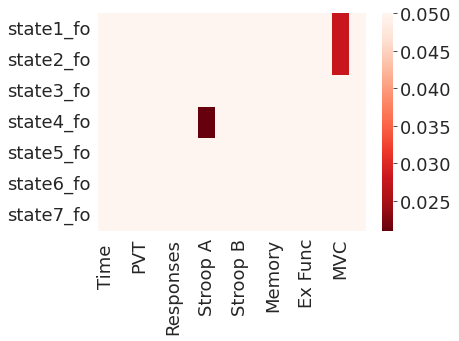

In [20]:
r_matrix, p_matrix= partial_corr(df_fo_perform,K_state,covariates=[],skipped=['chrono','time','TOD'])
sns.heatmap(p_matrix,cmap='Reds_r', vmax=0.05)

<AxesSubplot:>

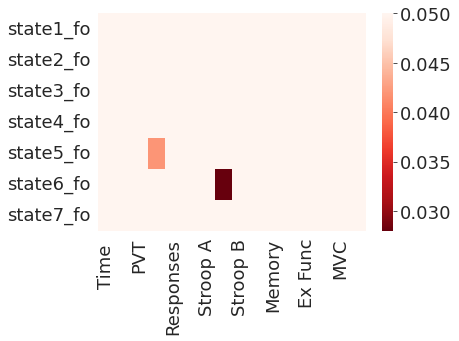

In [21]:
r_matrix, p_matrix= partial_corr(pd.concat([fo,per_m], axis=1),K_state, covariates=[],skipped=['chrono','time','TOD'])
sns.heatmap(p_matrix,cmap='Reds_r', vmax=0.05)

<AxesSubplot:>

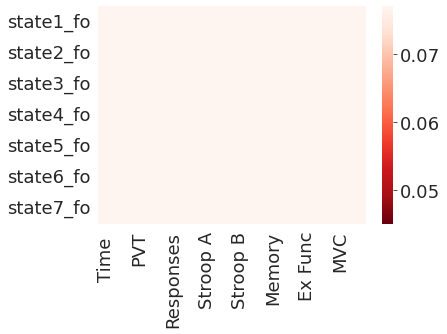

In [22]:
r_matrix, p_matrix= partial_corr(pd.concat([fo,per_a], axis=1),K_state,covariates=[],skipped=['chrono','time','TOD'])
sns.heatmap(p_matrix,cmap='Reds_r', vmax=0.05)

<AxesSubplot:>

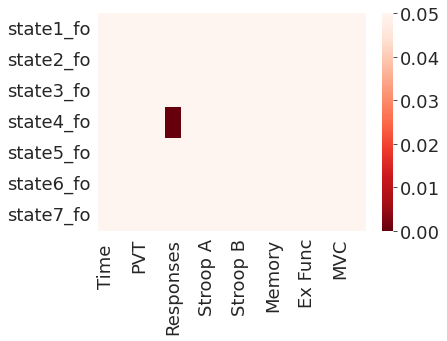

In [23]:
r_matrix, p_matrix= partial_corr(pd.concat([fo,per_e], axis=1),K_state,covariates=[],skipped=['chrono','time','TOD'])
sns.heatmap(p_matrix,cmap='Reds_r', vmax=0.05)

### Other behavior

In [24]:
def creat_corrdf(fo_tod,to_be_concat=[], to_be_drop=['ID No.', 'Category','Category','Category','Ethnic Origin', 'Unnamed: 18']):
    """
    fo_tod: the fo dataframe of a specific time of day.
    """
    return pd.concat([fo_tod]+to_be_concat, axis=1).drop(to_be_drop,axis=1)

In [25]:
fo_m_beh = creat_corrdf(fo_m, [physio, acti, scales]) ; fo_a_beh = creat_corrdf(fo_a, [physio, acti, scales]); fo_e_beh = creat_corrdf(fo_e,[physio, acti, scales])
fo_beh_list = [fo_m_beh, fo_a_beh, fo_e_beh]
fo_m_beh.columns

Index(['state1_fo', 'state2_fo', 'state3_fo', 'state4_fo', 'state5_fo',
       'state6_fo', 'state7_fo', 'chrono', 'time', 'PER3', 'DLMO',
       'Phase Angle', 'Peak  Time', 'Peak Conc', 'Cor  Time', 'Cor Conc',
       'CAR %', 'AUC Total', 'AUC 1st Hour', 'Days', 'Bed time', 'Get up time',
       'Time in bed', 'Sleep start', 'Sleep end', 'Assumed sleep',
       'Actual sleep time', 'Actual sleep (%)', 'Actual wake time',
       'Actual wake (%)', 'Sleep efficiency', 'Sleep latency',
       'Total activity score', 'Mean activity score',
       'Mean score in active periods', 'Fragmentation index',
       'Avg wake movement', 'IS', 'IV', 'L5', 'L5-onset-phase', 'M10',
       'M10-onset-phase', 'AMP', 'RA', '%OB>IBM', '%IB<OBM', 'Gender', 'Age',
       'Handedness ', 'Height', 'Weight', 'MSFsc', 'PSQI', 'POMS', 'ESS',
       'DEPRESSION', 'ANXIETY', 'STRESS', 'DASS', 'BREAKFAST', 'WD'],
      dtype='object')

<AxesSubplot:>

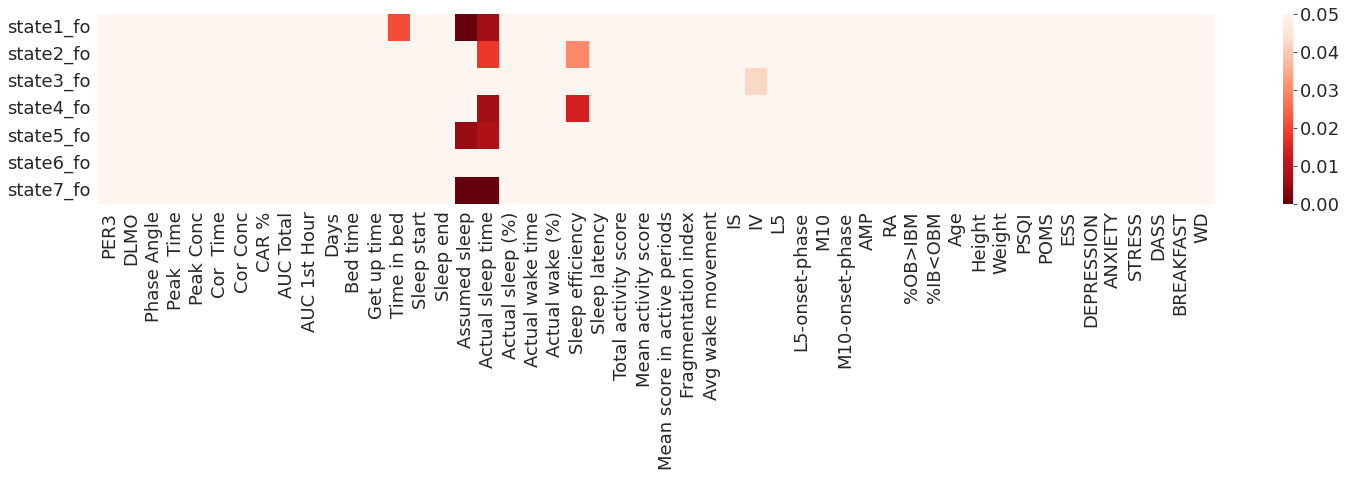

In [66]:
r_matrix, p_matrix= partial_corr(fo_m_beh,K_state,covariates=['MSFsc'],skipped=['chrono','MSFsc', 'Gender', 'Handedness ','time'])
plt.figure(figsize=(25,K_state/2))
sns.heatmap(p_matrix,cmap='Reds_r',vmax=0.05)

<AxesSubplot:>

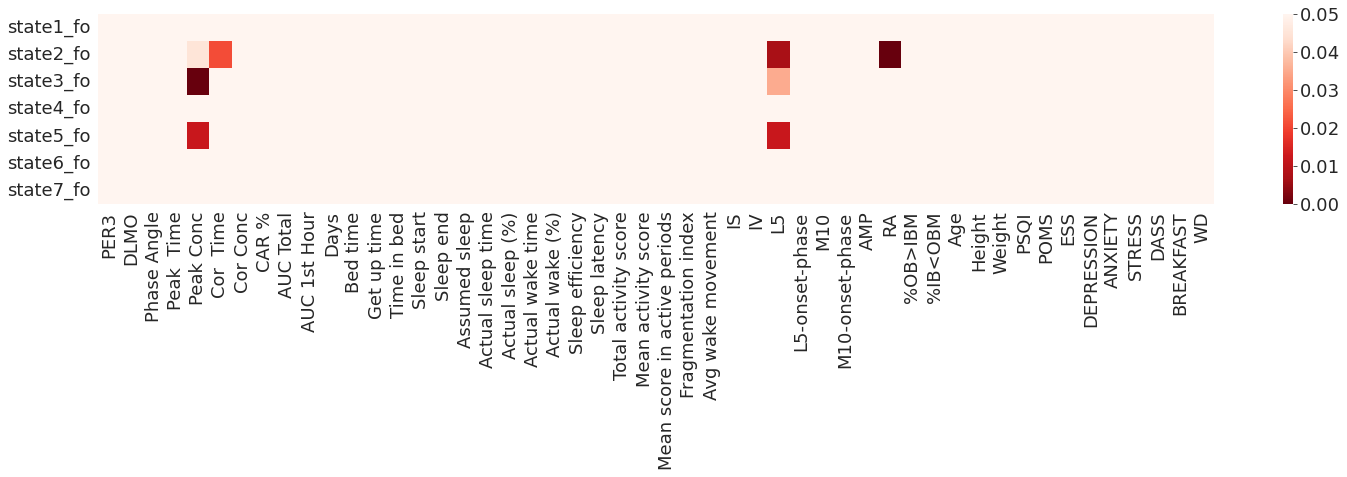

In [28]:
r_matrix, p_matrix= partial_corr(fo_a_beh,K_state,covariates=['MSFsc'],skipped=['chrono','MSFsc', 'Gender', 'Handedness ','time'])
plt.figure(figsize=(25,K_state/2))
sns.heatmap(p_matrix,cmap='Reds_r',vmax=0.05)


<AxesSubplot:>

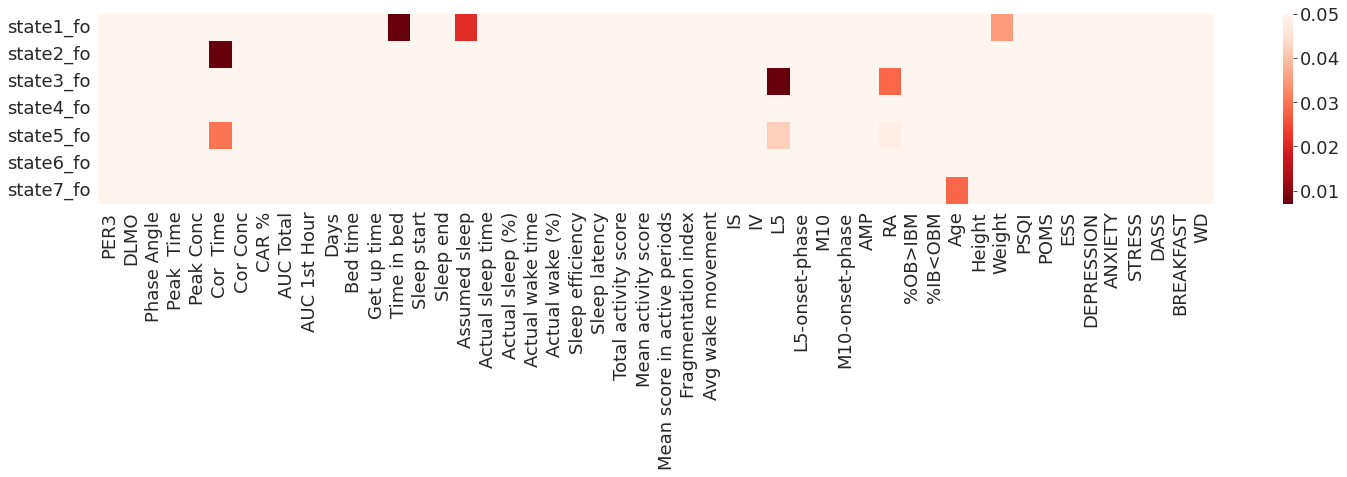

In [29]:
r_matrix, p_matrix= partial_corr(fo_e_beh,K_state,covariates=['MSFsc'],skipped=['chrono','MSFsc', 'Gender', 'Handedness ','time'])
plt.figure(figsize=(25,K_state/2))
sns.heatmap(p_matrix,cmap='Reds_r',vmax=0.05)

### States FO & Sleep Time Regplot
Session 0 -> Morning

Session 1 -> Afternoon

Session 2 -> Evening

In [71]:
def compare_r(feature, fo_beh_list=fo_beh_list):
    num_to_ses_dic = {0:'Morning', 1:'Afternoon', 2:'Evening'}
    df_r = pd.DataFrame([], columns=['Time of Day', 'r_value'])
    for i, fo_matrix in enumerate(fo_beh_list):  
        corr_matrix = fo_matrix.corr().iloc[:K_state,K_state:]
        df_tmp = pd.DataFrame([], columns=['Time of Day'])
        df_tmp.iloc[:,0] = [num_to_ses_dic[i] for k in range(K_state)]
        df_tmp['r_value'] = corr_matrix[feature].values
        df_r = pd.concat([df_r, df_tmp])
    df_r.reset_index(inplace=True,drop=True)
    df_r['State'] =  np.tile(np.array([f'state {i+1}' for i in range(K_state)]), 3)
    df_r.rename(columns={'r_value':feature},inplace=True)
    plt.figure(figsize=(12,9))
    fig_set()
    sns.barplot(x='State', y=feature,hue='Time of Day', data=df_r,palette="Set2")
    plt.title(f'Correlation Coefficient of {feature} and State Fractional Occupancy')
    plt.tight_layout()
    save_svg(f'correlation/{feature}_tod_coefficient')
    plt.show()
# Plot each session seperately
def ordered_sep_regplot_warp(feature, fo_beh_list, subplot_num=9, subplot_set=(3,3),figsize=(15,12), title=""):
    for i, fo_matrix in enumerate(fo_beh_list):  
        print(f"session {i+1}")
        corr_matrix = fo_matrix.corr().iloc[:K_state,K_state:]
        state_list = abs(corr_matrix[feature]
                ).sort_values(ascending=False).index[:subplot_num]
        plt.figure(figsize=figsize)
        plt.title(title)
        for i in range(len(state_list)):
            ax = plt.subplot(subplot_set[0],subplot_set[1],i+1)
            fig_set()
            plt.tight_layout()
            sns.regplot(x=state_list[i],y=feature,data=fo_matrix,ax=ax,color='Grey')
        plt.show()

def lmplot_warp(feature, fo_beh_list, subplot_num=9, subplot_set=(3,3),figsize=(15,12), title=""):
    """
    use sns.lmplot to plot them together. 
    """
    fo_beh_conc = pd.concat([fo_beh_list[0],fo_beh_list[1],fo_beh_list[2]]).reset_index(drop=True)
    for i in range(K_state):
        plt.tight_layout()
        sns.lmplot(x=f"state{i+1}_fo", y=feature, hue='time', data=fo_beh_conc,palette="Set2")
        plt.show()


def warp_regplot(feature, fo_beh_list=fo_beh_list, sep_plot=False,subplot_num=9, subplot_set=(3,3),figsize=(15,12), title=""):
    compare_r(feature,fo_beh_list)
    if sep_plot:
        ordered_sep_regplot_warp(feature, fo_beh_list, subplot_num, subplot_set,figsize, title)
    else:        
        lmplot_warp(feature, fo_beh_list, subplot_num, subplot_set,figsize, title)


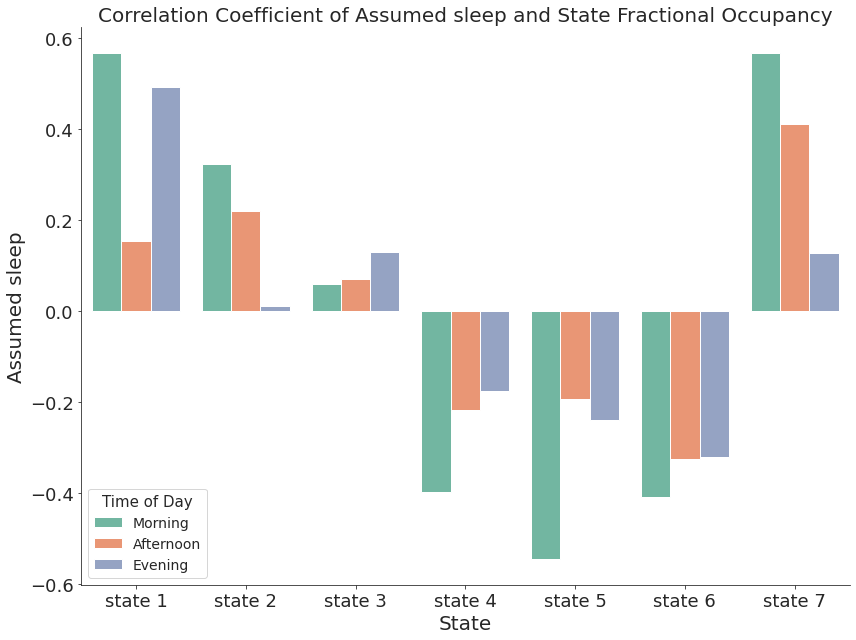

session 1


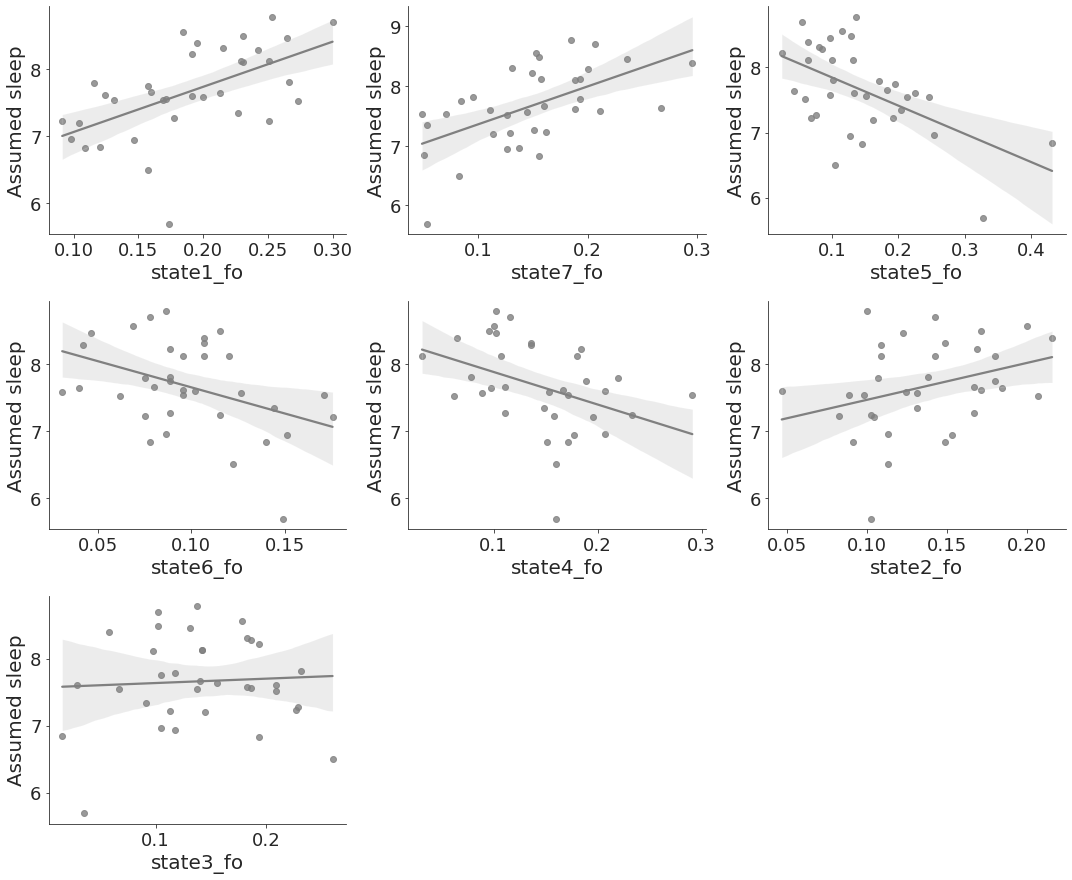

session 2


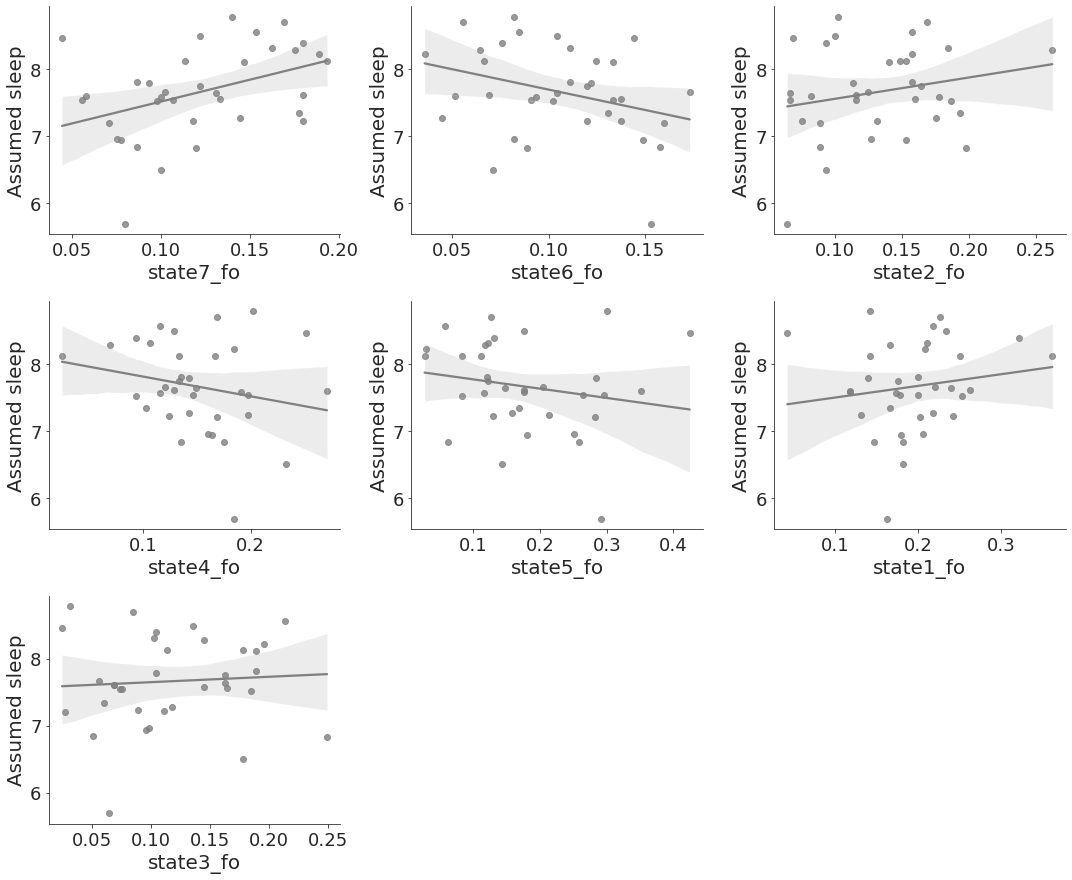

session 3


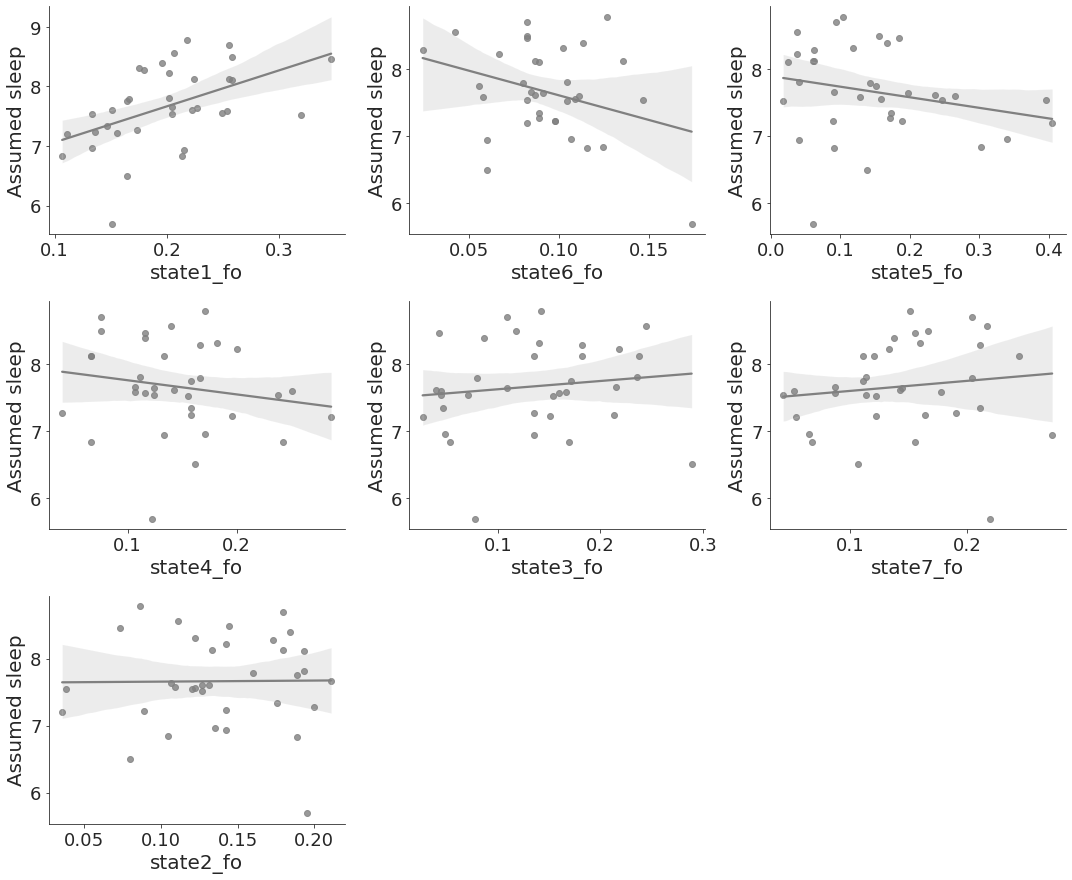

In [72]:
warp_regplot('Assumed sleep', sep_plot=True)   

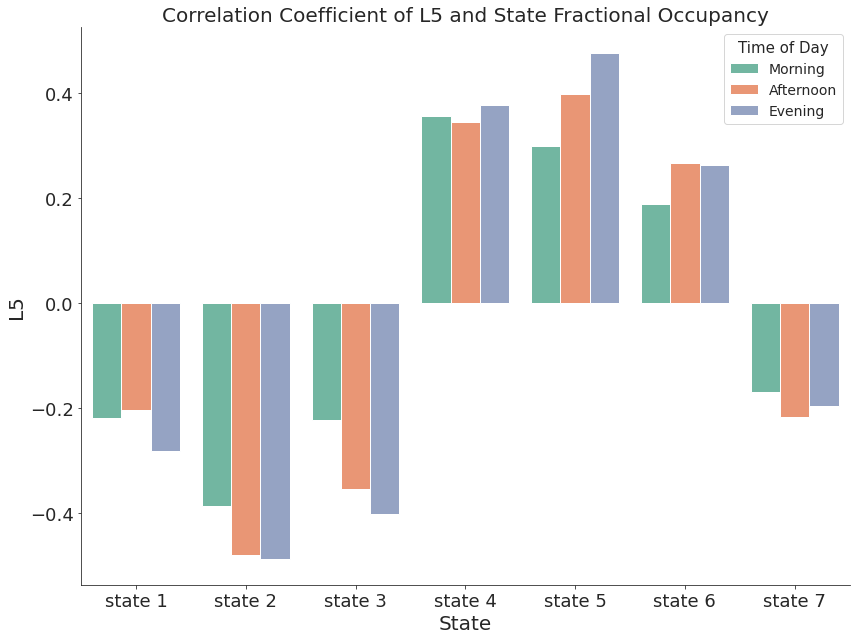

<Figure size 432x288 with 0 Axes>

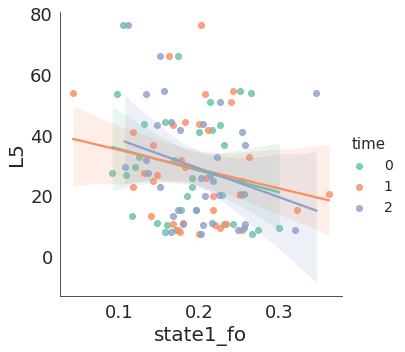

<Figure size 432x288 with 0 Axes>

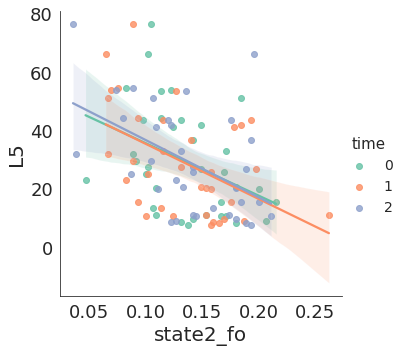

<Figure size 432x288 with 0 Axes>

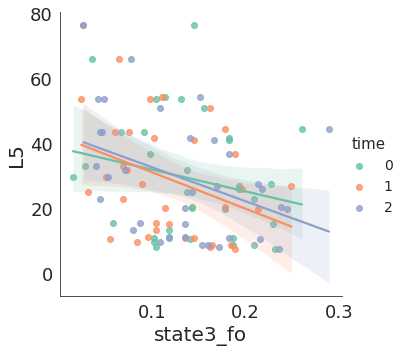

<Figure size 432x288 with 0 Axes>

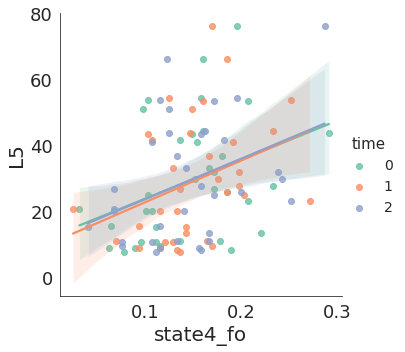

<Figure size 432x288 with 0 Axes>

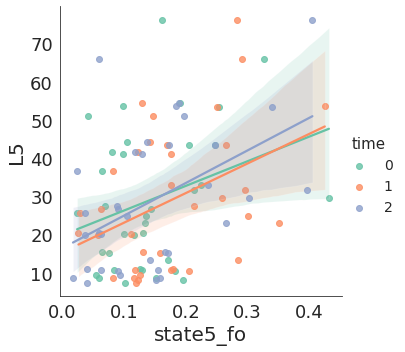

<Figure size 432x288 with 0 Axes>

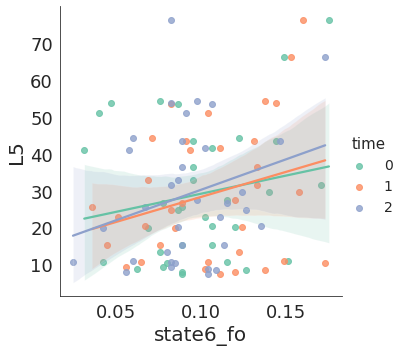

<Figure size 432x288 with 0 Axes>

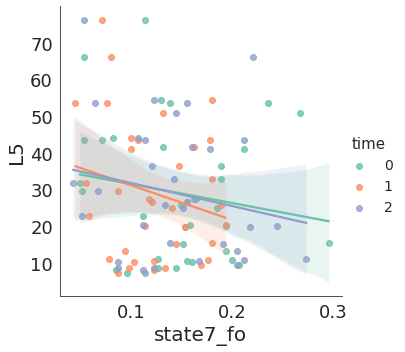

In [73]:
warp_regplot('L5')   

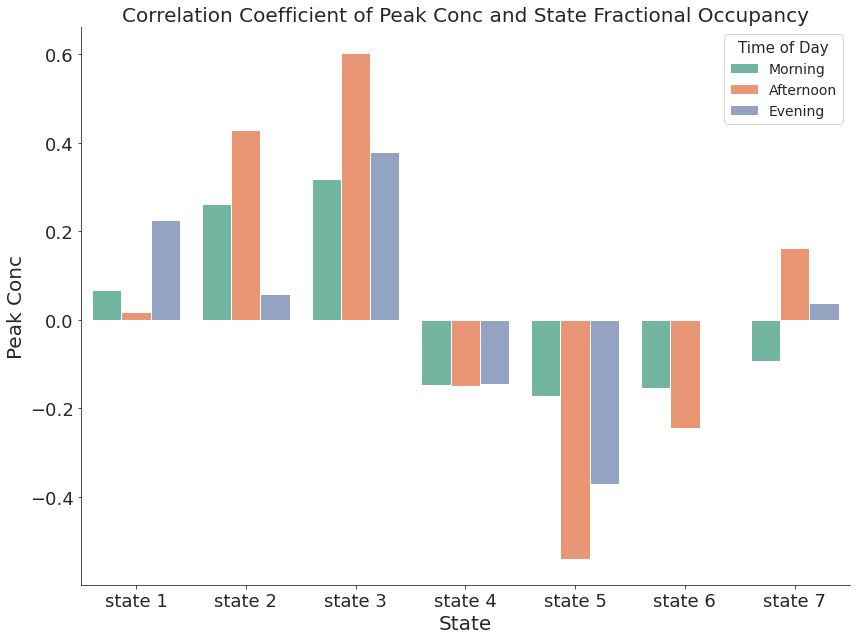

<Figure size 432x288 with 0 Axes>

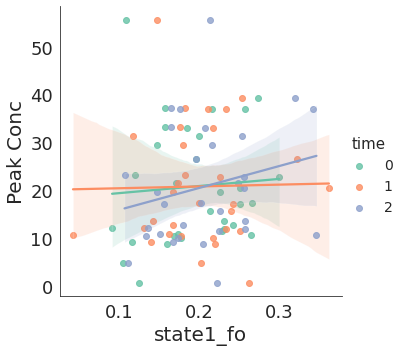

<Figure size 432x288 with 0 Axes>

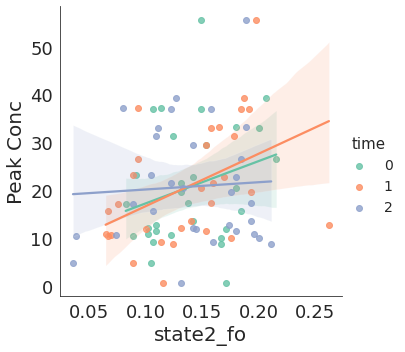

<Figure size 432x288 with 0 Axes>

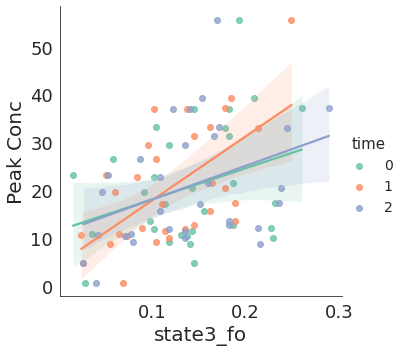

<Figure size 432x288 with 0 Axes>

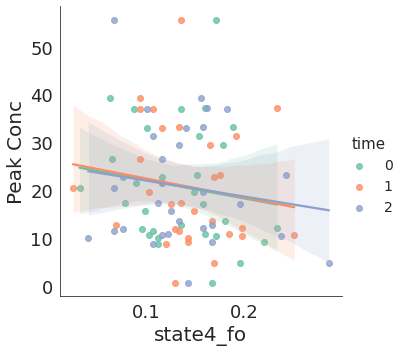

<Figure size 432x288 with 0 Axes>

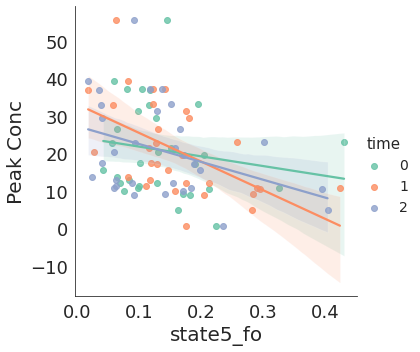

<Figure size 432x288 with 0 Axes>

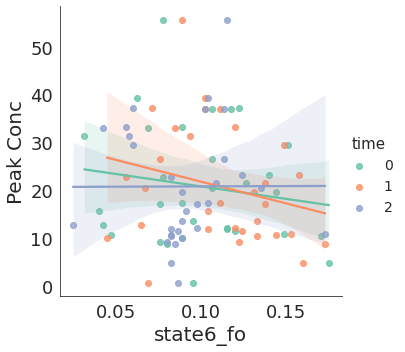

<Figure size 432x288 with 0 Axes>

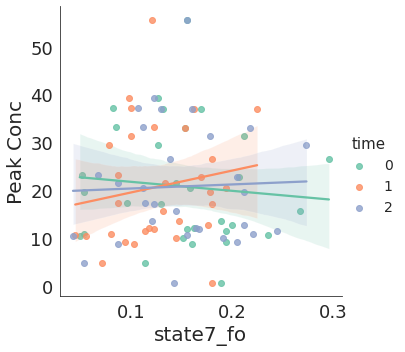

In [74]:
warp_regplot('Peak Conc')

### States FO & Actigraph Regplot

* The IV provides an estimate of the fragmentation of the 24-hour rest–activity pattern (IV ≃ 0 for a perfect sine wave, IV ≃ 2 for Gaussian noise). For example, higher IVs could be observed among individuals who often nap during the daytime and are more frequently awake during the night. 
* The IS provides an estimate of how closely the 24-hour rest–activity pattern follows the 24-hour light–dark cycle (IS ≃ 0 for Gaussian noise, IS ≃ 1 for perfect stability). As such, higher IS could indicate good synchronization to light and other environmental cues that regulate the biological clock, assuming the participant was awake during the light cycle and asleep during the dark cycle. 
* The M10 reflects the mean number of active minutes/hour during the 10 hours with the highest activity; thus, a higher M10 represents a more active wake period. The M10 midpoint provides an indication of whether a person is most active earlier or later in the day. 
* In contrast, the L5 reflects the mean number of active minutes/hour during the 5 hours with the lowest activity; thus, a lower L5 indicates more restful sleep. Furthermore, the time of day when L5 occurs (L5 midpoint) provides an indication of whether a person goes to bed earlier or later in the day. 
* Finally, the RA is the difference between M10 and L5 in the average 24-hour pattern, normalized by their sum; higher RAs therefore indicate a more robust 24-hour rest–activity pattern, reflecting both higher activity when awake and relatively lower activity during the night.

ref: Elizabeth M Cespedes Feliciano, ScD, MSc, Mirja Quante, MD, Jia Weng, PhD, Jonathan A Mitchell, PhD, Peter James, Scd, MHS, Catherine R Marinac, PhD, Sara Mariani, PhD, Susan Redline, MD, MPH, Jacqueline Kerr, PhD, Suneeta Godbole, MPH, Alicia Manteiga, MPH, Daniel Wang, J Aaron Hipp, Actigraphy-Derived Daily Rest–Activity Patterns and Body Mass Index in Community-Dwelling Adults, Sleep, Volume 40, Issue 12, December 2017, zsx168, https://doi.org/10.1093/sleep/zsx168